In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Data from brench outputs as strings
tdce_data = """
benchmark,run,result
skipped,baseline,4
skipped,trivial_dce,4
combo,baseline,6
combo,trivial_dce,5
reassign,baseline,3
reassign,trivial_dce,3
double,baseline,6
double,trivial_dce,4
double-pass,baseline,6
double-pass,trivial_dce,4
diamond,baseline,6
diamond,trivial_dce,6
simple,baseline,5
simple,trivial_dce,4
reassign-dkp,baseline,3
reassign-dkp,trivial_dce,3
"""

dce_data = """
benchmark,run,result
skipped,baseline,4
skipped,local_dce,4
combo,baseline,6
combo,local_dce,5
reassign,baseline,3
reassign,local_dce,2
double,baseline,6
double,local_dce,4
double-pass,baseline,6
double-pass,local_dce,4
diamond,baseline,6
diamond,local_dce,6
simple,baseline,5
simple,local_dce,4
reassign-dkp,baseline,3
reassign-dkp,local_dce,2
"""

lvn_data = """
benchmark,run,result
redundant-dce,baseline,6
redundant-dce,lvn,2
reassign,baseline,3
reassign,lvn,3
fold-comparisons,baseline,missing
fold-comparisons,lvn,missing
commute,baseline,6
commute,lvn,2
nonlocal-clobber,baseline,4
nonlocal-clobber,lvn,4
clobber-fold,baseline,10
clobber-fold,lvn,5
idchain,baseline,5
idchain,lvn,5
clobber,baseline,10
clobber,lvn,5
redundant,baseline,6
redundant,lvn,2
nonlocal,baseline,7
nonlocal,lvn,7
divide-by-zero,baseline,missing
divide-by-zero,lvn,missing
idchain-nonlocal,baseline,6
idchain-nonlocal,lvn,6
idchain-prop,baseline,5
idchain-prop,lvn,5
rename-fold,baseline,7
rename-fold,lvn,4
clobber-arg,baseline,3
clobber-arg,lvn,3
logical-operators,baseline,missing
logical-operators,lvn,missing
"""

# Read data into pandas DataFrames
from io import StringIO

tdce_df = pd.read_csv(StringIO(tdce_data))
dce_df = pd.read_csv(StringIO(dce_data))
lvn_df = pd.read_csv(StringIO(lvn_data))

# Function to process data and plot histograms
def plot_histograms(df, optimization_name, title_suffix):
    # Pivot the DataFrame to have benchmarks as rows and runs as columns
    pivot_df = df.pivot(index='benchmark', columns='run', values='result')
    
    # Convert 'missing' to NaN and results to numeric
    pivot_df = pivot_df.replace('missing', np.nan)
    pivot_df = pivot_df.apply(pd.to_numeric)
    
    # Drop benchmarks where both baseline and optimized results are missing
    pivot_df = pivot_df.dropna(subset=['baseline', optimization_name], how='all')
    
    # Compute the difference between baseline and optimized
    if 'baseline' in pivot_df.columns and optimization_name in pivot_df.columns:
        pivot_df['difference'] = pivot_df['baseline'] - pivot_df[optimization_name]
    else:
        print(f"Cannot find both 'baseline' and '{optimization_name}' in data.")
        return
    
    # Plot histograms of baseline and optimized results
    pivot_df[['baseline', optimization_name]].plot(kind='bar', figsize=(12,6))
    plt.title(f'Baseline vs {optimization_name} Results ({title_suffix})')
    plt.ylabel('Result')
    plt.xlabel('Benchmark')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    
    # Plot histogram of differences
    pivot_df['difference'].plot(kind='bar', color='green', figsize=(12,6))
    plt.title(f'Difference in Results (Baseline - {optimization_name}) ({title_suffix})')
    plt.ylabel('Difference')
    plt.xlabel('Benchmark')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

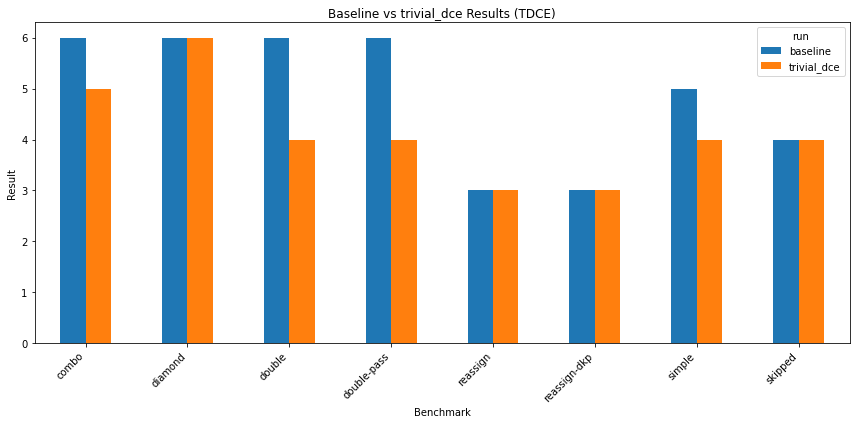

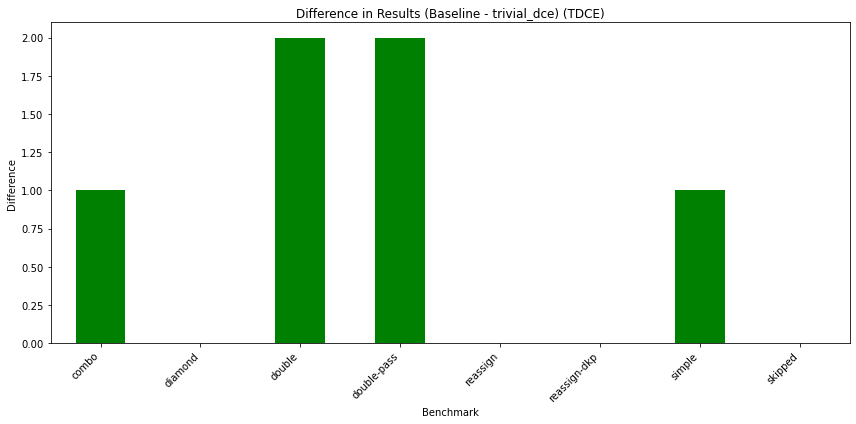

In [2]:
# Plot histograms for tdce data
plot_histograms(tdce_df, 'trivial_dce', 'TDCE')

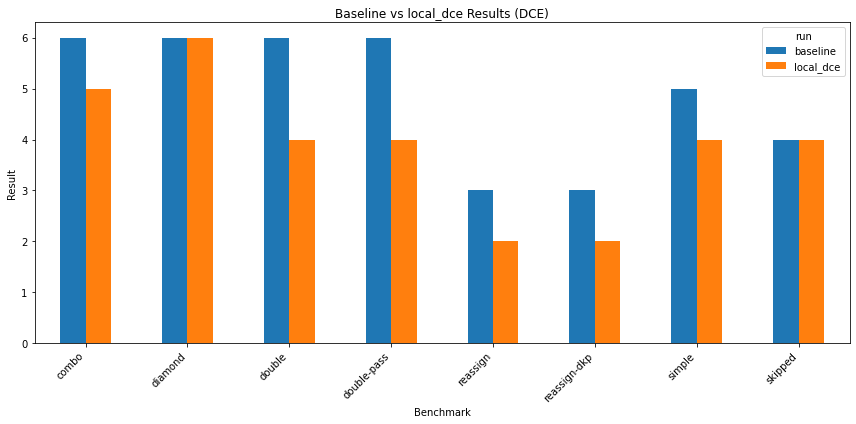

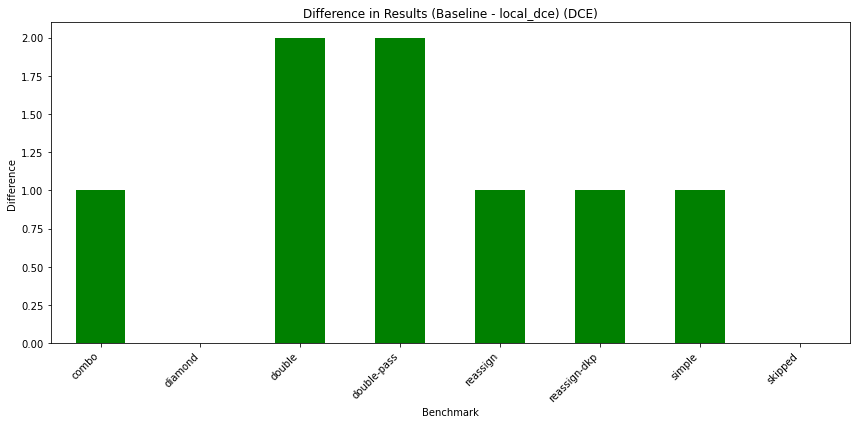

In [3]:
# Plot histograms for dce data
plot_histograms(dce_df, 'local_dce', 'DCE')

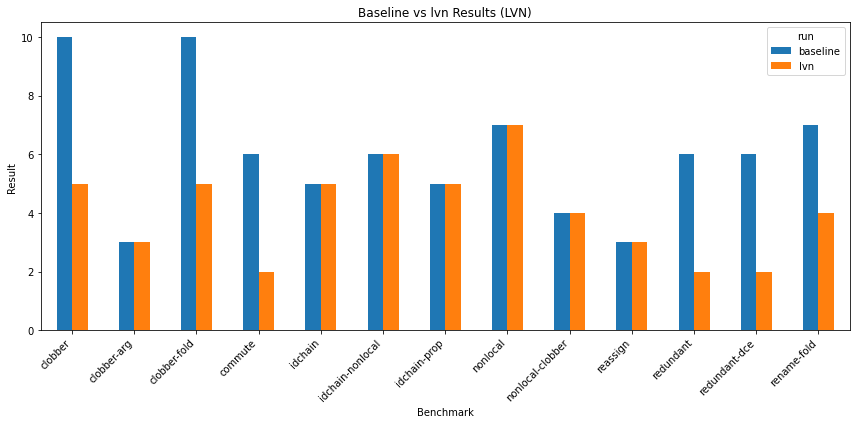

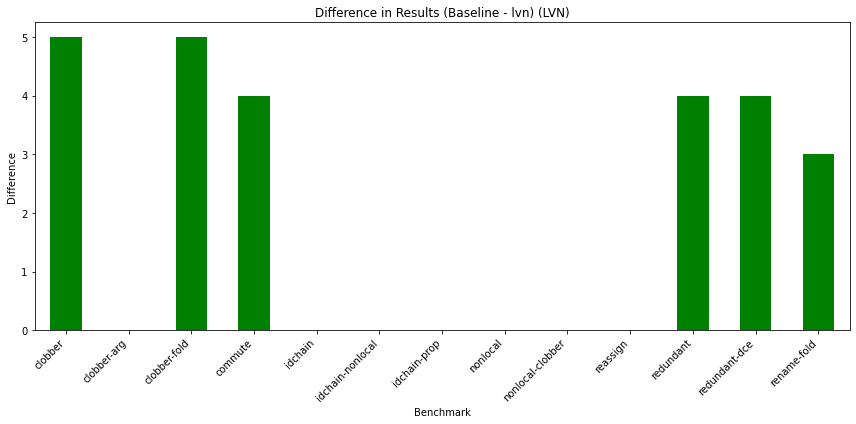

In [4]:
# Plot histograms for lvn data
plot_histograms(lvn_df, 'lvn', 'LVN')